In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [102]:
apps = pd.read_csv("googleplaystore.csv")

In [103]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [104]:
len(apps)

10841

In [105]:
apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [106]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Seleção
### Removendo App, Size, Genres, Last Updated, Current ver, Android ver

In [107]:
apps = apps[['Category', 'Rating', 'Reviews', 'Installs', 'Type', 'Price', 'Content Rating']]

In [108]:
apps.head()

,Category,Rating,Reviews,Installs,Type,Price,Content Rating
0,ART_AND_DESIGN,4.1,159,"10,000+",Free,0,Everyone
1,ART_AND_DESIGN,3.9,967,"500,000+",Free,0,Everyone
2,ART_AND_DESIGN,4.7,87510,"5,000,000+",Free,0,Everyone
3,ART_AND_DESIGN,4.5,215644,"50,000,000+",Free,0,Teen
4,ART_AND_DESIGN,4.3,967,"100,000+",Free,0,Everyone


# Limpeza

In [109]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 7 columns):
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
dtypes: float64(1), object(6)
memory usage: 592.9+ KB


### Removendo todos os registros com algum campo nulo

In [110]:
apps.dropna(how='any', inplace=True)

In [111]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 7 columns):
Category          9366 non-null object
Rating            9366 non-null float64
Reviews           9366 non-null object
Installs          9366 non-null object
Type              9366 non-null object
Price             9366 non-null object
Content Rating    9366 non-null object
dtypes: float64(1), object(6)
memory usage: 585.4+ KB


### Deixando atributos legíves para o processamento

In [101]:
apps.head()

,Category,Rating,Reviews,Installs,Type,Price,Content Rating
0,ART_AND_DESIGN,4.1,159,"10,000+",Free,0,Everyone
1,ART_AND_DESIGN,3.9,967,"500,000+",Free,0,Everyone
2,ART_AND_DESIGN,4.7,87510,"5,000,000+",Free,0,Everyone
3,ART_AND_DESIGN,4.5,215644,"50,000,000+",Free,0,Teen
4,ART_AND_DESIGN,4.3,967,"100,000+",Free,0,Everyone


#### Rating -> float;
#### Reviews -> float

In [112]:
apps['Reviews'] = apps['Reviews'].astype(float)

In [113]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 7 columns):
Category          9366 non-null object
Rating            9366 non-null float64
Reviews           9366 non-null float64
Installs          9366 non-null object
Type              9366 non-null object
Price             9366 non-null object
Content Rating    9366 non-null object
dtypes: float64(2), object(5)
memory usage: 585.4+ KB


#### Installs: remover + então -> int

In [115]:
# Verificando se todos terminam com +
apps[apps['Installs'].apply(lambda x: False if x[-1] == '+' else True)]

,Category,Rating,Reviews,Installs,Type,Price,Content Rating


In [116]:
apps['Installs'] = apps['Installs'].apply(lambda x: int(x[:-1]))

ValueError: invalid literal for int() with base 10: '10,000'

In [117]:
# substituindo vírgulas por vazio
apps['Installs'] = apps['Installs'].apply(lambda x: int(x[:-1].replace(',', '')))

In [118]:
apps.head()

,Category,Rating,Reviews,Installs,Type,Price,Content Rating
0,ART_AND_DESIGN,4.1,159.0,10000,Free,0,Everyone
1,ART_AND_DESIGN,3.9,967.0,500000,Free,0,Everyone
2,ART_AND_DESIGN,4.7,87510.0,5000000,Free,0,Everyone
3,ART_AND_DESIGN,4.5,215644.0,50000000,Free,0,Teen
4,ART_AND_DESIGN,4.3,967.0,100000,Free,0,Everyone


In [119]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 7 columns):
Category          9366 non-null object
Rating            9366 non-null float64
Reviews           9366 non-null float64
Installs          9366 non-null int64
Type              9366 non-null object
Price             9366 non-null object
Content Rating    9366 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 585.4+ KB


#### price: remover $ -> float

In [122]:
apps_pagos = apps[apps['Type'] == "Paid"]

In [125]:
# Verificando se todos os apps pagos começam com $
apps_pagos[apps_pagos['Price'].apply(lambda x: False if x[0] == '$' else True)]

,Category,Rating,Reviews,Installs,Type,Price,Content Rating


In [126]:
apps['Price'] = apps['Price'].apply(lambda x: 0.0 if x == '0' else float(x[1:]))

In [127]:
apps.head()

,Category,Rating,Reviews,Installs,Type,Price,Content Rating
0,ART_AND_DESIGN,4.1,159.0,10000,Free,0.0,Everyone
1,ART_AND_DESIGN,3.9,967.0,500000,Free,0.0,Everyone
2,ART_AND_DESIGN,4.7,87510.0,5000000,Free,0.0,Everyone
3,ART_AND_DESIGN,4.5,215644.0,50000000,Free,0.0,Teen
4,ART_AND_DESIGN,4.3,967.0,100000,Free,0.0,Everyone


In [129]:
apps[apps['Type'] == "Paid"].head()

,Category,Rating,Reviews,Installs,Type,Price,Content Rating
234,BUSINESS,4.7,11442.0,100000,Paid,4.99,Everyone
235,BUSINESS,4.8,10295.0,100000,Paid,4.99,Everyone
290,BUSINESS,4.7,11442.0,100000,Paid,4.99,Everyone
291,BUSINESS,4.8,10295.0,100000,Paid,4.99,Everyone
427,COMMUNICATION,4.0,18247.0,100000,Paid,3.99,Everyone


In [131]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 7 columns):
Category          9366 non-null object
Rating            9366 non-null float64
Reviews           9366 non-null float64
Installs          9366 non-null int64
Type              9366 non-null object
Price             9366 non-null float64
Content Rating    9366 non-null object
dtypes: float64(3), int64(1), object(3)
memory usage: 585.4+ KB


# Pairplot

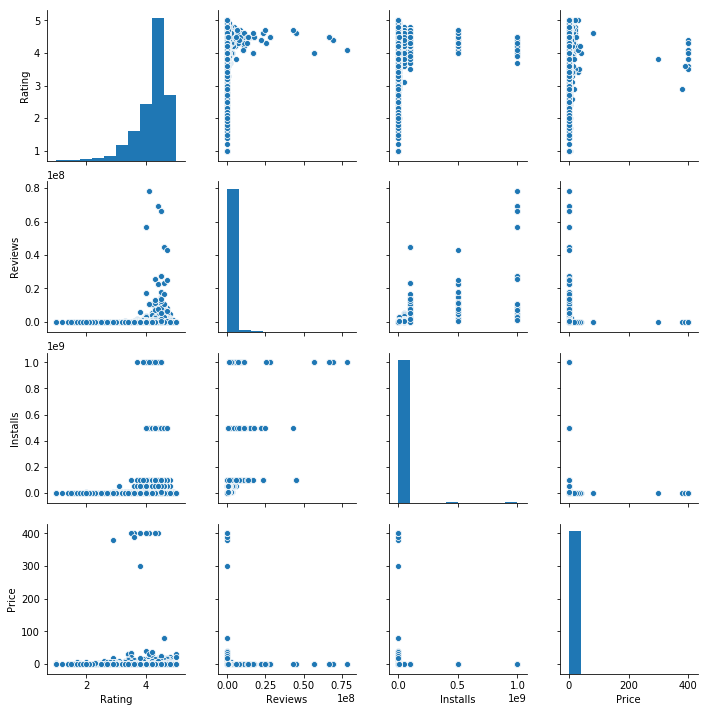

In [142]:
sns.pairplot(apps)

# Quais são as categorias?

In [132]:
apps['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

# Quantos apps tem em cada categoria?

In [133]:
apps['Category'].value_counts()

FAMILY                 1747
GAME                   1097
TOOLS                   734
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               314
PERSONALIZATION         314
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       65
ART_AND_DESIGN           62
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

# Quantos apps têm para cada faixa etária?

In [134]:
apps['Content Rating'].value_counts()

Everyone           7420
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

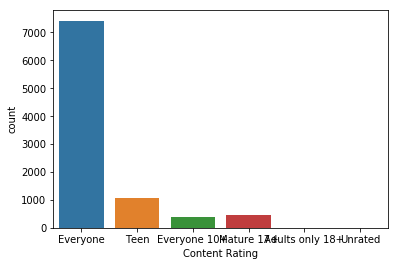

In [135]:
sns.countplot(x='Content Rating', data=apps)

# Quantos são grátis?

In [136]:
apps_limpo['Type'].value_counts()

Free    8715
Paid     645
Name: Type, dtype: int64

# Qual a proporção de apps pagos por categoria?
### Considerando apenas as 10 categorias mais frequentes

In [162]:
categorias = ['FAMILY', 'GAME', 'TOOLS', 'PRODUCTIVITY', 'MEDICAL', 'COMMUNICATION', 'FINANCE', 'SPORTS', 
             'PHOTOGRAPHY', 'LIFESTYLE']

In [163]:
apps_categorias_comuns = apps[apps['Category'].apply(lambda x: True if x in categorias else False)]

In [164]:
apps_categorias_comuns.head()

,Category,Rating,Reviews,Installs,Type,Price,Content Rating
335,COMMUNICATION,4.0,56642847.0,1000000000,Free,0.0,Everyone
336,COMMUNICATION,4.4,69119316.0,1000000000,Free,0.0,Everyone
337,COMMUNICATION,4.3,125257.0,10000000,Free,0.0,Teen
338,COMMUNICATION,4.3,9642995.0,1000000000,Free,0.0,Everyone
339,COMMUNICATION,4.4,1429035.0,100000000,Free,0.0,Everyone


In [165]:
info_categorias = []
for categoria in categorias:
    valores = apps_categorias_comuns[apps_categorias_comuns['Category'] == categoria]['Type'].value_counts()
    info = {}
    info['categoria'] = categoria
    try:
        info['proporcao'] = valores['Paid'] / (valores['Paid'] + valores['Free'])
    except KeyError:
        try:
             valores['Paid']
        except KeyError:
            info['proporcao'] = 0
        else:
            info['proporcao'] = 1
    info_categorias.append(info)

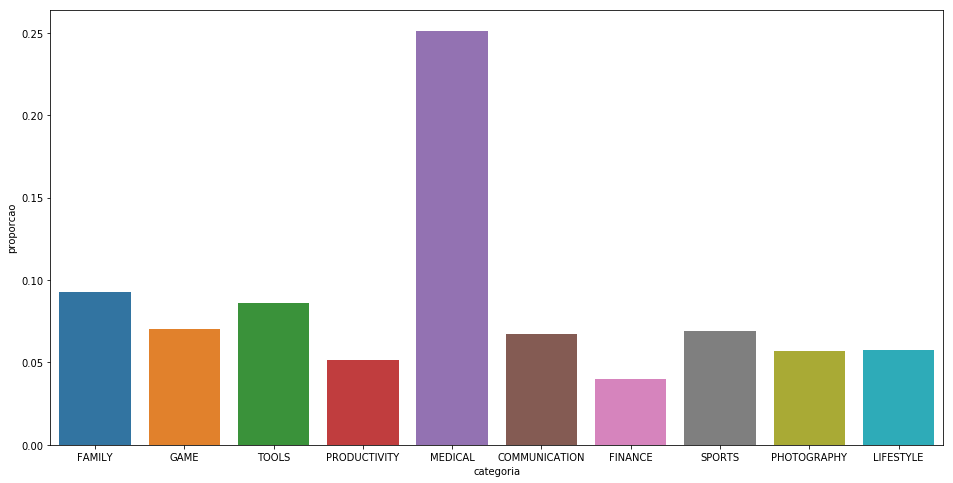

In [168]:
plt.figure(figsize=(16,8))
sns.barplot(x='categoria', y='proporcao', data=pd.DataFrame(info_categorias))

# Qual o preço dos apps pagos?

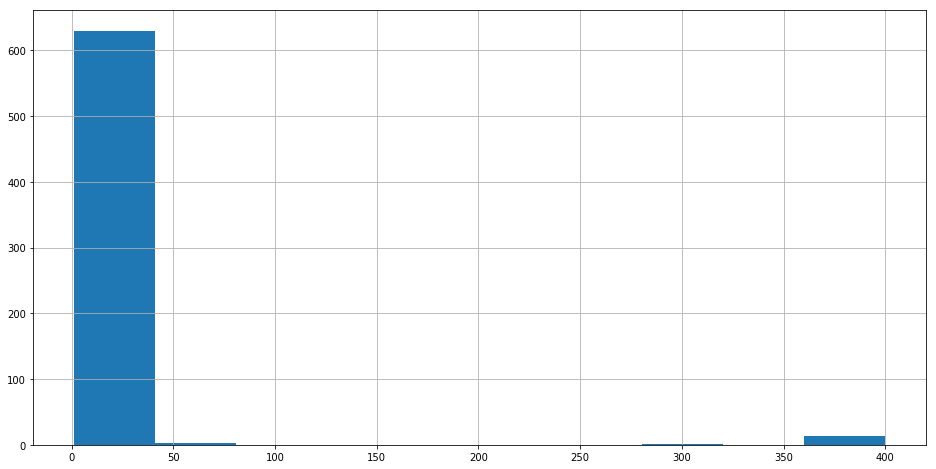

In [172]:
plt.figure(figsize=(16,8))
apps[apps['Type'] == 'Paid']['Price'].hist()

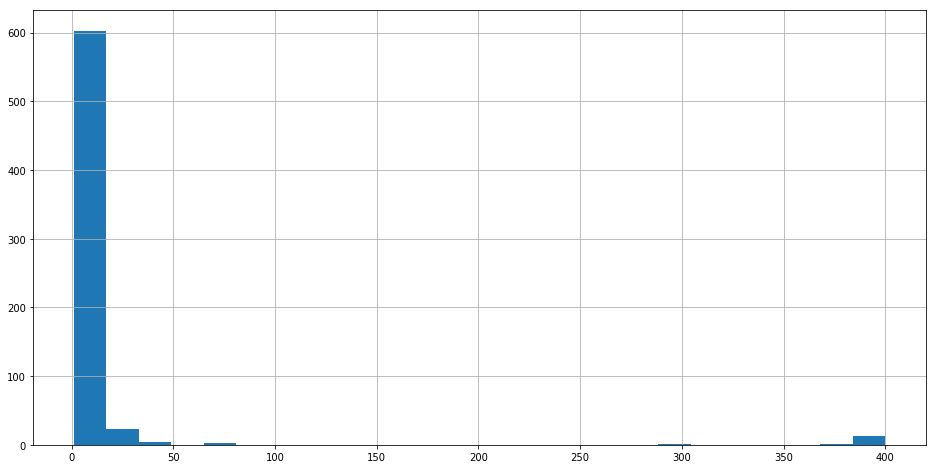

In [173]:
bins = int(np.sqrt(len(apps[apps['Type'] == 'Paid'])))

plt.figure(figsize=(16,8))
apps[apps['Type'] == 'Paid']['Price'].hist(bins=bins)

#### Apenas os que custam menos de 50 dólares

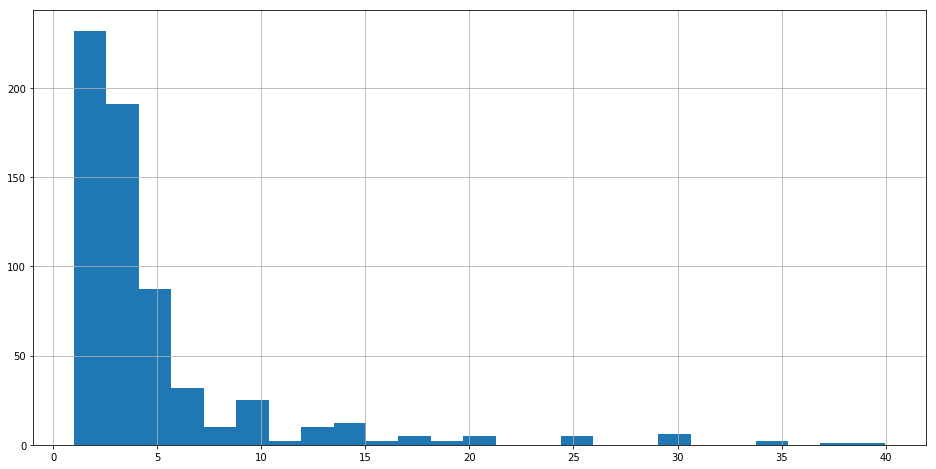

In [174]:
bins = int(np.sqrt(len(apps[apps['Type'] == 'Paid'])))

plt.figure(figsize=(16,8))
apps[(apps['Type'] == 'Paid') & (apps['Price'] < 50.0)]['Price'].hist(bins=bins)